# Required Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [40]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Column Descriptions
- PassengerId: Unique Id of a passenger
- Survived: Survived (1) or died (0)
- Pclass: Ticket class (1st - Upper, 2nd - Middle, or 3rd - Lower)
- Age: Age of the Passenger; Fractional if Age less than one (1).
- SibSp: Number of siblings/spouses traveling with the passenger
- Parch: Number of parents/children traveling with the passenger
- Ticket: Ticket number
- Fare: Passenger Fare
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [43]:
# checking the number of missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [47]:
# checking the percentage of missing values in the Age column
print(train.isnull().sum()["Age"]/ len(train))

0.19910011248593926


In [46]:
# checking the percentage of missing values in the Cabin column
print(train.isnull().sum()["Cabin"]/ len(train))

0.7727784026996626


The data shows that 77% of the Cabin entries are nan values. However, this is not ther case as only first class members had cabins labelled A to F, and T and G. Therefore, we can fill the nan values with 'No Cabin' for the other classes later on. 

<Axes: >

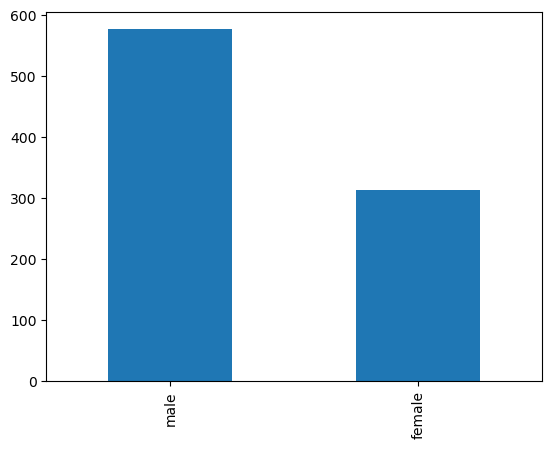

In [44]:
# asserting that only 2 values are present in the column
assert len(train.Sex.unique()) == 2
# if it is 2, then we can plot the bar graph
train.Sex.value_counts().plot(kind='bar', alpha=1)

['S' 'C' 'Q' nan]
After dropping nan entries: ['S' 'C' 'Q']


<Axes: >

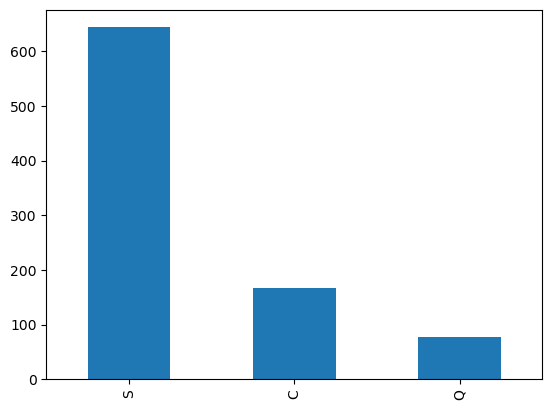

In [45]:
# asserting that only 3 values are present in the Embarked column
print(train.Embarked.unique())

# dropping the rows with null values in the Embarked column
# since there are only 2 null values
train.dropna(subset=['Embarked'], inplace=True)

# asserting that only 2 values are present in the Embarked column
assert len(train.Embarked.unique()) == 3

print("After dropping nan entries:",train.Embarked.unique())
train.Embarked.value_counts().plot(kind='bar')

[3 1 2]
After dropping nan entries: [3 1 2]


<Axes: >

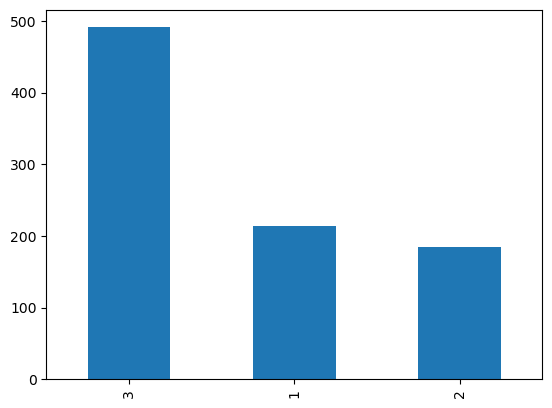

In [50]:
# asserting that only 3 values are present in the Embarked column
print(train.Pclass.unique())

# dropping the rows with null values in the Embarked column
# since there are only 2 null values
train.dropna(subset=['Pclass'], inplace=True)

# asserting that only 2 values are present in the Embarked column
assert len(train.Pclass.unique()) == 3

print("After dropping nan entries:",train.Pclass.unique())
train.Pclass.value_counts().plot(kind='bar')

# Feature Engineering

for reference on feature engineering, please see this [link](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/).

In [57]:
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']

### Adding a Title Column

In [61]:
import string
def look_for_title(name, title_list):
    # looping through our title list
    for title in title_list:
        if title in name:
            return title
    # if we don't find any title in the name
    return np.nan

In [62]:
train['Title'] = train['Name'].map(lambda x: look_for_title(x, title_list))

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Constricting our Title Column to Only [A Single Man (Master), A Single Woman (Miss), A Married Man (Mr), and a Married Woman (Mrs)]

In [75]:
def replace_title(data):
    title = data['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if data['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train_copy = train.copy()
train_copy['Title'] = train_copy.apply(replace_title, axis=1)
train_copy['Title'].value_counts()

# verifying our result

# checking that the sum of the counts of the Mr corresponding titles that were replaced is equal to the count of the 'Mr' title in our new column
assert (train['Title'].value_counts()['Mr'] + train['Title'].value_counts()['Don'] + train['Title'].value_counts()['Major'] + train['Title'].value_counts()['Capt']
        + train['Title'].value_counts()['Jonkheer'] + train['Title'].value_counts()['Rev'] + train['Title'].value_counts()['Col']
        +  train[train['Sex']=='male']['Title'].value_counts()['Dr'] 
        == train_copy['Title'].value_counts()['Mr'])
print("The assertion test for the 'Mr' title is passed")

# checking that the sum of the counts of the Mrs corresponding titles that were replaced is equal to the count of the 'Mrs' title in our new column
assert (train['Title'].value_counts()['Mrs'] + train['Title'].value_counts()['Countess'] + train['Title'].value_counts()['Mme']
        + train[train['Sex'] == 'female']['Title'].value_counts()['Dr'] 
        == train_copy['Title'].value_counts()['Mrs'])
print("The assertion test for the 'Mrs' title is passed")

# checking that the sum of the counts of the Miss corresponding titles that were replaced is equal to the count of the 'Miss' title in our new column
assert (train['Title'].value_counts()['Miss'] + train['Title'].value_counts()['Mlle'] + train['Title'].value_counts()['Ms']
        == train_copy['Title'].value_counts()['Miss'])
print("The assertion test for the 'Miss' title is passed")

# checking that the sum of the counts of the Master corresponding titles that were replaced is equal to the count of the 'Master' title in our new column
assert (train['Title'].value_counts()['Master'] == train_copy['Title'].value_counts()['Master'])
print("The assertion test for the 'Master' title is passed")

The assertion test for the 'Mr' title is passed
The assertion test for the 'Mrs' title is passed
The assertion test for the 'Miss' title is passed
The assertion test for the 'Master' title is passed


In [78]:
# replacing nan values with "No Cabin" in the Cabin column
train_copy['Cabin'].fillna('No Cabin', inplace=True)
train_copy.Cabin.value_counts()

No Cabin       687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

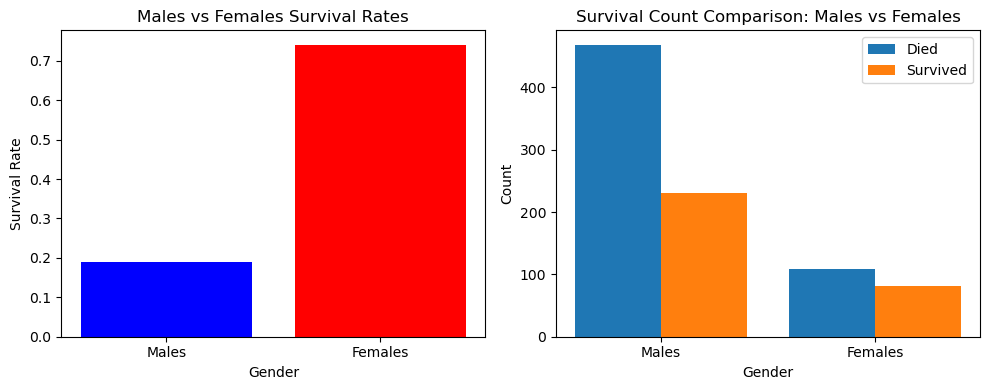

In [48]:
# basic visualizations to understand the data

males = train[train['Sex'] == "male"]
females = train[train['Sex'] == "female"]

# computing survival rates for both
male_survival_rate = males["Survived"].mean()
female_survival_rate = females["Survived"].mean()

male_survival_counts = males["Survived"].value_counts()
female_survival_counts = females["Survived"].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].bar(["Males", "Females"], [male_survival_rate, female_survival_rate], color=["blue", "red"])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Survival Rate")
axes[0].set_title("Males vs Females Survival Rates")

bar_positions = np.arange(2)
bar_width = 0.4
axes[1].bar(bar_positions - bar_width/2, male_survival_counts, bar_width, label='Died')
axes[1].bar(bar_positions + bar_width/2, female_survival_counts, bar_width, label='Survived')
axes[1].set_title('Survival Count Comparison: Males vs Females')
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(['Males', 'Females'])
axes[1].set_xlabel("Gender")
axes[1].legend()
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()